<a href="https://colab.research.google.com/github/Martika98/Interview_task/blob/main/zadanie_rekrutacyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

Importing data into a dataframe, semicolon as a  separator. Setting datatype as string

In [383]:
train_data = pd.read_csv("training.csv", sep = ';')
train_data.v2 = train_data.v2.astype(str)
train_data.v7 = train_data.v7.astype(str)
train_data.v15 = train_data.v15.astype(str)

val_data = pd.read_csv("validation.csv", sep = ';')
val_data.v2 = val_data.v2.astype(str)
val_data.v7 = val_data.v7.astype(str)
val_data.v15 = val_data.v15.astype(str)

In [384]:
train_data.head(10)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,"17,92","5,4e-05",u,"-0,840182024985552","0,522882590622095","1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,"-2,15963506605476","0,774187133555115","0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,"1,75068668089807","0,76036270650308",0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,"4,17487068567425","0,888963139486792","0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,"-3,78547915257514","0,489023844085239","0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,"34,83","0,000125",y,"2,29828432668","0,686024869345298","0,5",f,f,0,t,g,160.0,0,1600000.0,f,0,no.
6,a,"26,17",2e-04,u,"-0,639583994634449","0,518365188538744",0,f,f,0,t,g,276.0,1,2760000.0,NaN,0,no.
7,b,"21,17","8,75e-05",y,"3,93449979601428","0,631455415459759","0,25",f,f,0,f,g,280.0,204,2800000.0,NaN,0,no.
8,b,"28,92","3,75e-05",u,"3,27661601360887","0,702000174009591","0,29",f,f,0,f,g,220.0,140,2200000.0,NaN,0,no.
9,b,"18,17","0,001025",u,"-0,926149950828403","0,558275161650767","1,085",f,f,0,f,g,320.0,13,3200000.0,NaN,0,no.


In [385]:
val_data.head(11)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,b,"32,33","0,00075",u,"0,840107307","0,544982291","1,585",t,f,0,t,s,420.0,0,4200000,NaN,1,no.
1,b,"23,58","0,000179",u,"-4,174395711","0,864361709","0,54",f,f,0,t,g,136.0,1,1360000,NaN,0,no.
2,b,"36,42","7,50E-05",y,"2,23222567","0,627475551","0,585",f,f,0,f,g,240.0,3,2400000,NaN,1,no.
3,b,"18,42","0,0010415",y,"-2,469969629","0,846741022","0,125",t,f,0,f,g,120.0,375,1200000,NaN,0,no.
4,b,"24,5","0,0013335",y,"-3,149422333","0,321087006","0,04",f,f,0,t,g,120.0,475,1200000,f,1,no.
5,a,"39,08","4,00E-04",u,"-0,503893639","0,799051454",3,f,f,0,f,g,480.0,0,4800000,f,0,no.
6,b,"23,42","1,00E-04",u,"-2,810378929","0,73844739","0,5",f,f,0,t,s,280.0,0,2800000,NaN,1,no.
7,b,"29,58","0,000475",u,"-3,487245305","0,473373749",2,f,t,1,t,g,460.0,68,4600000,t,0,no.
8,b,"27,42","0,00125",u,"1,208498753","0,677835585","0,25",f,f,0,t,g,720.0,0,7200000,f,1,no.
9,b,"58,58","0,000271",u,"2,338491785","0,315189255","2,415",f,f,0,t,g,320.0,0,3200000,NaN,0,no.


Function str2float replaces commas with dots


In [386]:
def str2float(df, col_list):
  for col_name in col_list:
    df[col_name] = df[col_name].apply(lambda x: float(x.replace(',', '.')))

List of column names with comma instead of dots

In [387]:
col_list = ['v2', 'v3', 'v5', 'v7', 'v6', 'v15']
str2float(train_data, col_list)
str2float(val_data, col_list)

Remaining columns with type 'object'

In [388]:
rest_col_names = list(train_data.columns[train_data.dtypes == object])
print(rest_col_names)

['v1', 'v4', 'v8', 'v9', 'v11', 'v12', 'v16', 'classLabel']


Analizing unique columns values

In [389]:
print(train_data['v1'].unique())
print(train_data['v4'].unique())
print(train_data['v12'].unique())
train_data['v16'].unique()
train_data['classLabel'].unique() #v8/9/11/16
print(val_data['v1'].unique())
print(val_data['v4'].unique())
print(val_data['v12'].unique())
print(val_data['classLabel'].unique()) #v8/9/11/16
print(val_data['v16'].unique())
print(val_data['v11'].unique())
print(val_data['v9'].unique())
print(val_data['v8'].unique())
print(val_data['v17'].unique())

['a' 'b' nan]
['u' 'y' nan 'l']
['g' 's' 'p']
['b' 'a' nan]
['u' 'y' nan]
['s' 'g' 'p' 'o']
['no.' 'yes.']
[nan 'f' 't']
['t' 'f']
['f' 't']
['t' 'f']
[1 0]


v1 -> a/b   v4 -> u/y/l  v12 -> g/s/p  v8/9/11/16 -> t/f   classLabel -> yes./no.

Dict containing data to factorize values from letters to numbers

In [390]:
factorize_dict = {
    'a': 0,
    'b': 1,

    'u': 0,
    'y': 1,
    'l': 2,

    'f': 0,
    't': 1,

    'g': 0,
    's': 1,
    'p': 2,
    'o': 3,

    'no.': 0,
    'yes.': 1,

    'nan': np.nan,
    np.nan: np.nan,
    None: np.nan

}

Factorizing function

In [391]:
def factorize(df, col_list, factorize_dict):
  for col_name in col_list:
    df[col_name] = df[col_name].apply(lambda x: factorize_dict[x])

In [392]:
factorize(train_data, rest_col_names, factorize_dict)
factorize(val_data, rest_col_names, factorize_dict)

In [393]:
train_data.dtypes

v1            float64
v2            float64
v3            float64
v4            float64
v5            float64
v6            float64
v7            float64
v8              int64
v9              int64
v10             int64
v11             int64
v12             int64
v13           float64
v14             int64
v15           float64
v16           float64
v17             int64
classLabel      int64
dtype: object

Creating correlation matrix

In [394]:
train_corr = train_data.corr()
val_corr = val_data.corr()

<Axes: >

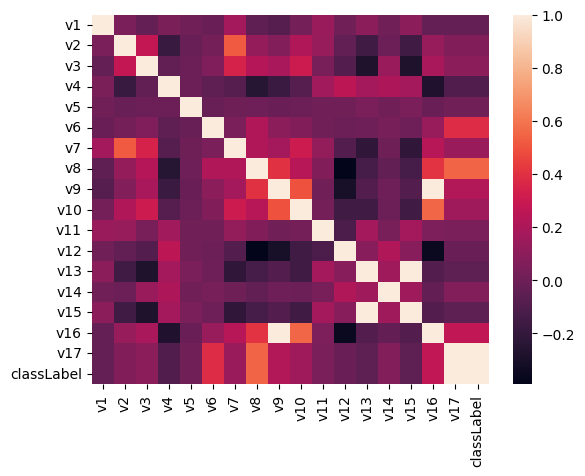

In [395]:
sns.heatmap(data=train_corr)

<Axes: >

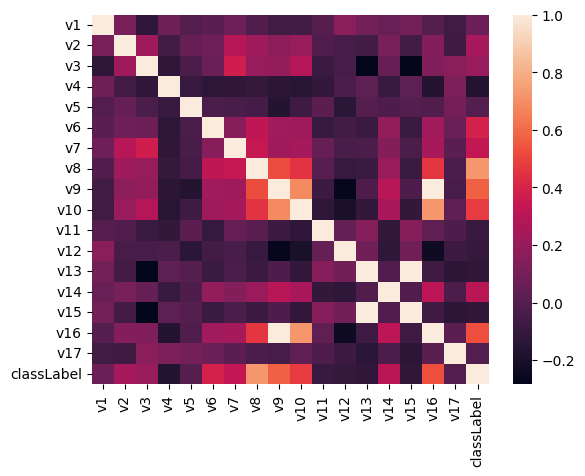

In [396]:
sns.heatmap(data=val_corr)

Variable v17 is lineary correlated with output value. Same thing occured in pairs v9 & v16 and v13 & v15. This means one the variables from each pair can be discarded, because it doesn't bring any new information.

v17 might be repeated class label in training data, in validation data there is no correlation between output value and v17

Code below creates a plot for none values of correlated variables pairs.

In [397]:
from bokeh.plotting import figure, show, output_file

#function creating dataframe with value for Nulls
def null_values_df(data_frame, column, value):
  data_nulls = data_frame[column].copy()
  data_nulls[data_frame[column].isnull()] = value
  data_nulls[data_frame[column].notnull()] = None
  return data_nulls

title = 'plot.html'
output_file(title)
p = figure(plot_width=600, plot_height=300, toolbar_location='above',title = 'wykresik')
p.background_fill_color='#faf9fa'

data_v16_nulls = null_values_df(train_data, 'v16', 1)
data_v9_nulls = null_values_df(train_data, 'v9', 2)
data_v13_nulls = null_values_df(train_data, 'v13', 3)
data_v15_nulls = null_values_df(train_data, 'v15', 4)

p.scatter(x=train_data.index, y=data_v9_nulls, color="red", size=12, legend_label='v9')
p.scatter(x=train_data.index, y=data_v16_nulls, color="blue", size=10, legend_label='v16')
p.scatter(x=train_data.index, y=data_v15_nulls, color="green", size=6, legend_label='v15')
p.scatter(x=train_data.index, y=data_v13_nulls, color="pink", size=4, legend_label='v13')

p.yaxis.axis_label='Variable'
p.xaxis.axis_label='index'

show(p)

Plot for variable v16 has many data gaps. Variable 9 and 16 are correlated with coef = 1 and v9 is complete. I will remove v13, because v13 and v15 lack data with the same indices.

Deleting excessive columns

In [398]:
train_data = train_data.drop(['v16', 'v13', 'v17'], axis = 1)
val_data = val_data.drop(['v16', 'v13', 'v17'], axis = 1)

Deleting rows with None

In [399]:
train_data = train_data.dropna()
val_data = val_data.dropna()

Most correlated variables in training data

In [400]:
train_corr = train_data.corr()
sorted_mat = train_corr.unstack().sort_values(ascending = False)['classLabel']
best_variables = train_corr.unstack()['classLabel'].nlargest(n=6)
best_variables_col = best_variables.index.values
print(best_variables_col)

['classLabel' 'v8' 'v6' 'v9' 'v10' 'v7']


Number of rows for each class

In [401]:
print(train_data[train_data['classLabel']==1]['classLabel'].count())
number_of_samples = train_data[train_data['classLabel']==0]['classLabel'].count()
print(number_of_samples)

3264
259


This tells me, there is a class imbalance

Oversampling

In [402]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(train_data.drop(columns = ['classLabel']), train_data['classLabel'])
print(sorted(Counter(y_resampled).items()))

[(0, 3264), (1, 3264)]


In [403]:
train_data_resampled = pd.concat([X_resampled, y_resampled], axis=1, join='inner')
train_data_resampled_0 = train_data_resampled[train_data_resampled['classLabel']==0]

In [404]:
train_data_0 = train_data[train_data['classLabel']==0]
train_data_1 = train_data[train_data['classLabel']==1]

train_data_1 = train_data_1.sample(n = int(train_data[train_data['classLabel']==1]['classLabel'].count()/2))
train_data = pd.concat([train_data_1, train_data_0])

Under sampling

In [405]:
train_data_0 = train_data[train_data['classLabel']==0]
train_data_1 = train_data[train_data['classLabel']==1]

In [406]:
train_data_1 = train_data_1.sample(n = 2*number_of_samples)
train_data_0 = pd.concat([train_data_0, train_data_resampled_0.sample(n = number_of_samples)])
train_data = pd.concat([train_data_1, train_data_0])

Choosing only best variables based on correlation (This operation is last, potentially more variables may give better quality samples. But running it earlier may lower number of rows deleted in deleting rows with none)

In [407]:
train_data = train_data[best_variables_col]
val_data = val_data[best_variables_col]

Standarizing data 

In [408]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Y_train = train_data['classLabel']
train_data_x = train_data.drop(columns = ['classLabel'])


Y_test = val_data['classLabel']
val_data_x  = val_data.drop(columns = ['classLabel'])


#X_train = train_data_x
#X_test = val_data_x
X_train = sc.fit_transform(train_data_x)
X_test = sc.transform(val_data_x)

KNN classifier

In [409]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8429319371727748


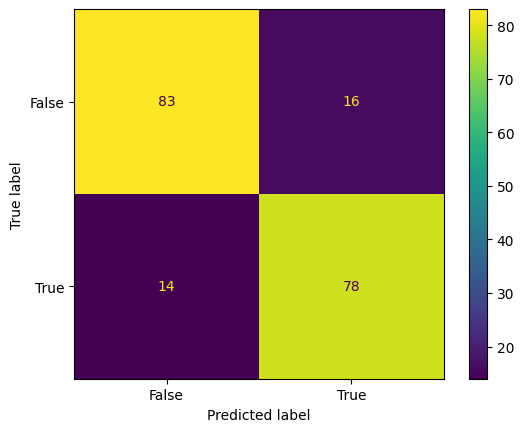

In [410]:
cm = confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

Random forest

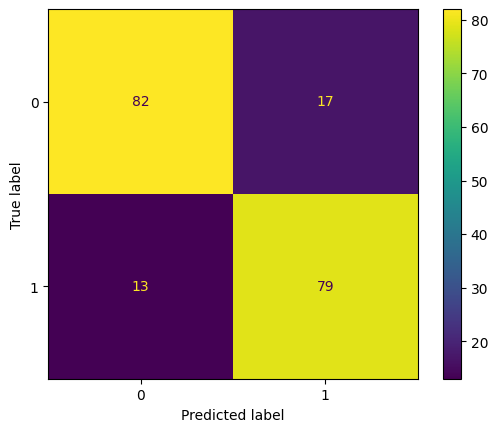

Accuracy: 0.8429319371727748


In [411]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0, class_weight='balanced')
#Train SMOTE SRF
SMOTE_SRF.fit(X_train, Y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
cm_tree = confusion_matrix(Y_test, y_pred, labels=SMOTE_SRF.classes_)
fig = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = SMOTE_SRF.classes_)
fig.plot()
plt.show()
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

KNN with bagging

In [412]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [413]:
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, Y_train)

print(gridsearch.best_params_)
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]

{'n_neighbors': 24, 'weights': 'uniform'}


In [414]:
from sklearn.ensemble import BaggingClassifier
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingClassifier(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=24),
                  n_estimators=100)

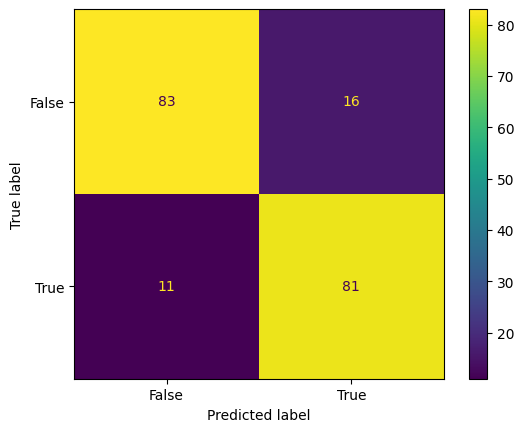

Accuracy: 0.8429319371727748


In [415]:
test_preds_grid = bagging_model.predict(X_test)
cm = confusion_matrix(Y_test, test_preds_grid)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

PCA

In [416]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
sc = StandardScaler()
Y_train = train_data['classLabel']
train_data_x = train_data.drop(columns = ['classLabel'])
Y_test = val_data['classLabel']
val_data_x  = val_data.drop(columns = ['classLabel'])

X_train = sc.fit_transform(train_data_x)
X_test = sc.transform(val_data_x)

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [417]:
explained_variance

array([0.49607594, 0.17117145])

In [418]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8324607329842932


Logistic Regression

In [419]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [420]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

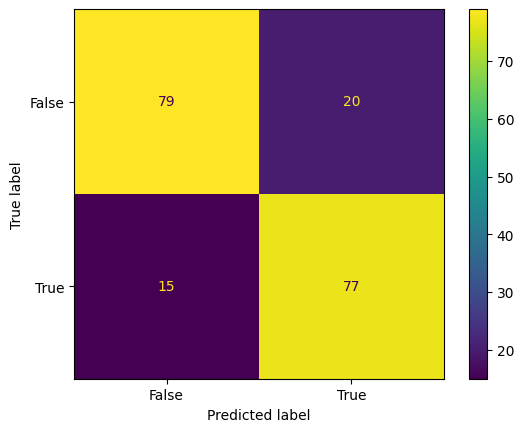

Accuracy: 0.8167539267015707


In [421]:
# making confusion matrix between
#  test set of Y and predicted value.

 
cm = confusion_matrix(Y_test, y_pred)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)